# Question 1

## a

Done reading
1


TypeError: 'tuple' object is not callable

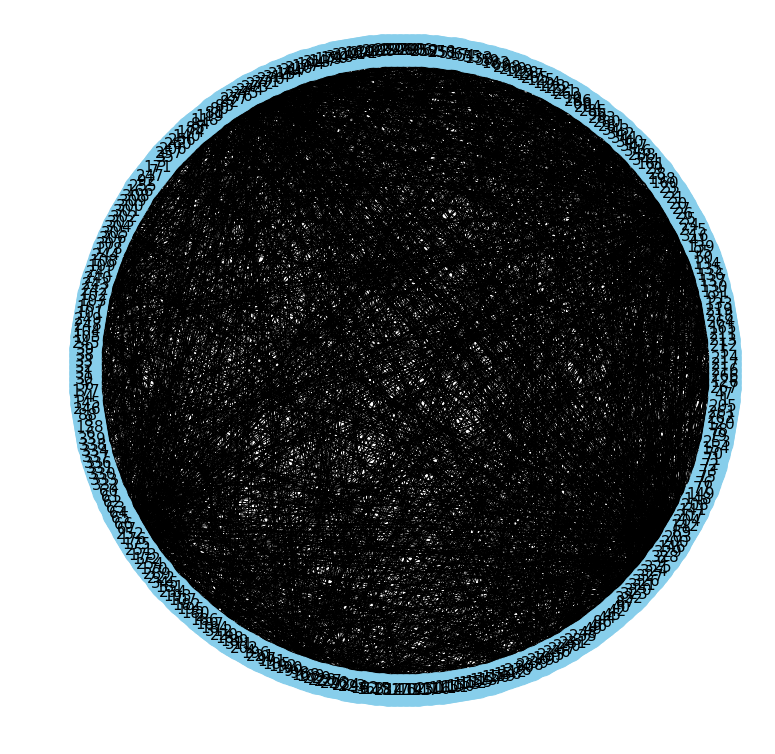

In [23]:
# a. Implement Newman-Girvan algorithm for non-overlapping communities. The
# algorithm should receive a network and parameter k (number of communities)
# are return the communities.
import networkx as nx
import matplotlib.pyplot as plt


def remove_edge(G):
    num_of_components = nx.number_connected_components(G)
    while (nx.number_connected_components(G) <= num_of_components):
        betweenness = nx.edge_betweenness_centrality(G, weight='weight')
        max_betweeness = max(betweenness.values())
        for edge in list(G.edges()):
            if (betweenness[edge] == max_betweeness):
                G.remove_edge(*edge)
        
def newman_girvan_algorithm(network, k):
    # number of nodes is 1
    if (network.order() == 1):
        return list(network.nodes())
    # until no edges left - 
    result = []
    num_of_components = 1;
    print (num_of_components)
    while (num_of_components < k):
        remove_edge(G)
        result.append(tuple(list(G) for g in nx.connected_component_subgraphs(G)))
        num_of_components = nx.number_connected_components(G)
        print ("now:", num_of_components)
    return result

with open("communities.txt") as file:
    G = nx.Graph()
    lines = [line.rstrip('\n') for line in file]
    for line in lines:
        edge = str(line).split(' ')
        #print (edge)
        G.add_edge(edge[0], edge[1])
    plt.figure(3,figsize=(10,10))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=15)
    #plt.show()
    print ("Done reading")
    com = newman_girvan_algorithm(G, 3)
    for list in com:
        print (com)
    print "DONE"
        

# Question 2

## a

In [ ]:
# Implement k-clique communities detection algorithm. The algorithm should
# receive a network and parameter k (size of clique) are return the communities.
import networkx as nx
import itertools

def get_subset_clique(node,k,B,G):
    A = set()
    A.add(node)
    while len(A) < k and len(B) > 0:
        n = B.pop(0)
        A.add(n)
        B = list(set(B).intersection(G[n]))
        if k == len(A):
            return {" ".join(sorted(A))}
    return []

def get_k_clique(G,k):
    clique = []
    for node in G:
        B = get_neighbours(node,G)
        for subset in itertools.permutations(B, k-1):
            clique += get_clique(node,k,list(subset),G)
    return clique

def k_clique_communities(G, k):
    